# Pre-processing of the Dataset "Titanic"

Goal:

- Create a new data set that can fit different kind of models, by removing the "NaN" and "String" variables.
- Get accuracy of different models to compare later with generated models

Titanic data set

Characteristics:
    - Number of instances: 891
    - Number of attributes: 10
    - Attribute information:
        "Survived": Wether the passenger survived or not
        "Pclass": Ticket class
        "Name": Name of the passenger
        "Sex": Gender of the passenger
        "Age": Age of the passenger
        "SibSp": Number of simblings / spouses aboard the Titanic
        "Parch": Number of parents / children aboard the Titanic
        "Ticket": Ticket number
        "Fare": Passenger fare
        "Cabin": Passenger's cabin number
        "Embarked": Port of Embarkation
        
This is a copy of the Titanic dataset: https://www.kaggle.com/c/titanic
It is used by many beginners in Machine Learning to getting started in this domain.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (16, 6)

## Exploring the Titanic data set

### 1. Importing the data set

In [2]:
df = pd.read_csv('../Data/titanic/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

The dataset has 891 and 12 columns, which means we have information over 890 passenger and 11 differents features (the last one being the Id). Now, we know what we will work with.

### 2. Data pre-processing

#### Missing values

Most ML models can't handle specific type of data such as "NaN" (which means Not a Number and usualy stand for missig values) or "String". Therfore, we'll have to handle them by modifying our dataset.

Counting the number of  missing values of each features

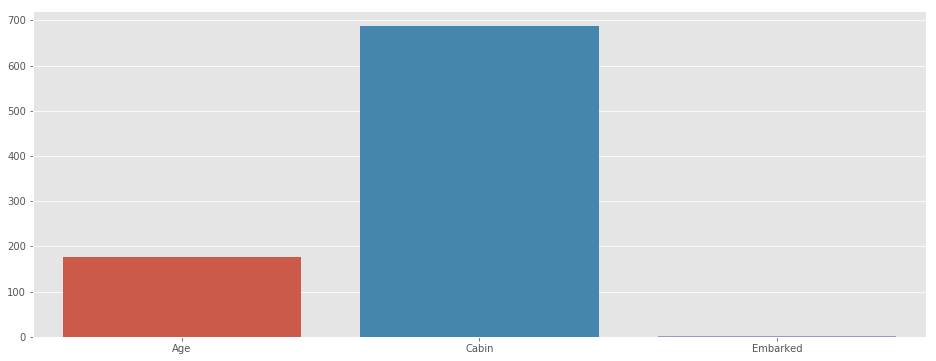

In [4]:
y_nan_values = []
x_nan_values = []
for col in df.columns:
    if(df[col].isna().sum()):
        y_nan_values.append(df[col].isna().sum())
        x_nan_values.append(col)
sns.barplot(x= x_nan_values, y=y_nan_values)

We can see that there are no missing values in most features. But there is a lot of them in "Cabin", some in "Age" and barely any in "Embarked"  

We decided to give up on the "Cabin" feature because there is more than 3/4 of values missing.

Let's work on filing the missing values in the "Age" features. We can see that their is a title in the name of the passenger, and none of those are missing. From this we can guess that a "Miss" is younge than a "Mrs".
First, we have to group each passenger by their "Title" included in their name

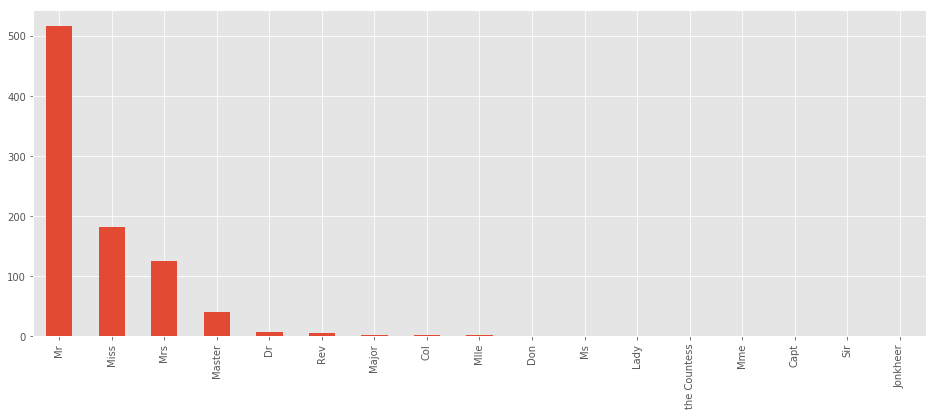

In [5]:
df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title'].value_counts().plot(kind='bar')
plt.show()

We then group each of those "Titles" to more general ones according to the fact that we are looking for the missing age value.

In [6]:
normalized_title = {
            'Mr':"Mr",
            'Mrs': "Mrs",
            'Ms': "Mrs",
            'Mme':"Mrs",
            'Mlle':"Miss",
            'Miss':"Miss",
            'Master':"Master",
            'Dr':"Officer",
            'Rev':"Officer",
            'Col':"Officer",
            'Capt':"Officer",
            'Major':"Officer",
            'Lady':"Royalty",
            'Sir':"Royalty",
            'the Countess':"Royalty",
            'Dona':"Royalty",
            'Don':"Royalty",
            'Jonkheer':"Royalty"
            
}
df.Title = df.Title.map(normalized_title)

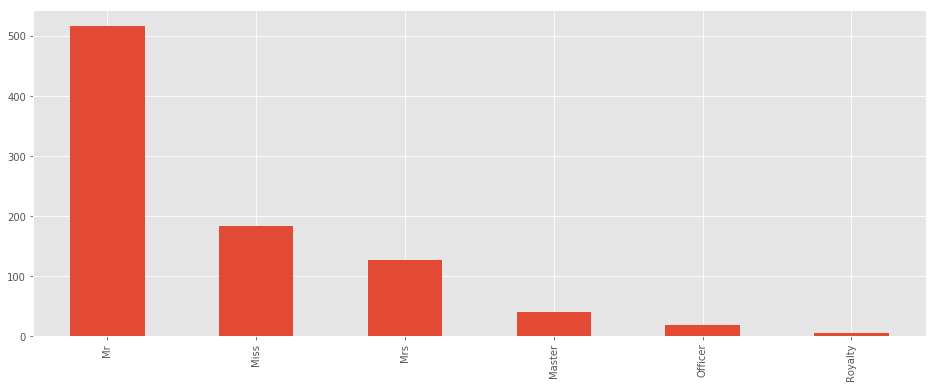

In [7]:
df['Title'].value_counts().plot(kind='bar')
plt.show()

We verify if the "Title" feature that we extracted do fit the data set

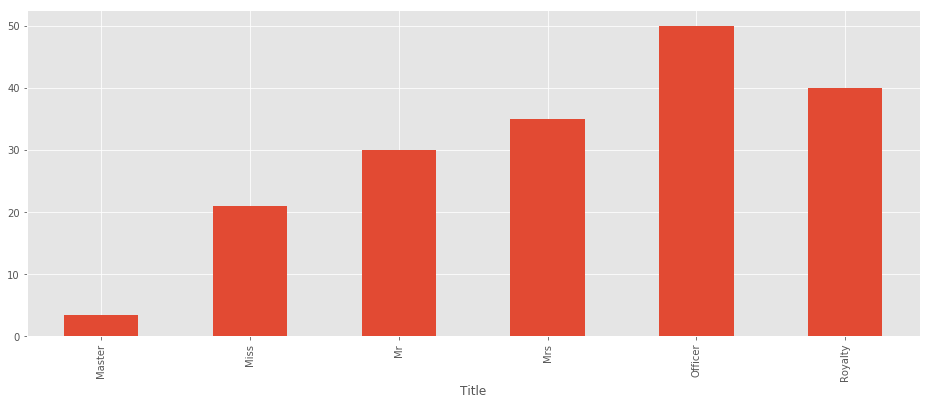

In [8]:
df.groupby("Title")['Age'].median().plot(kind='bar')
plt.show()

We affect the median age of the differents group to fill the missing values of our data set

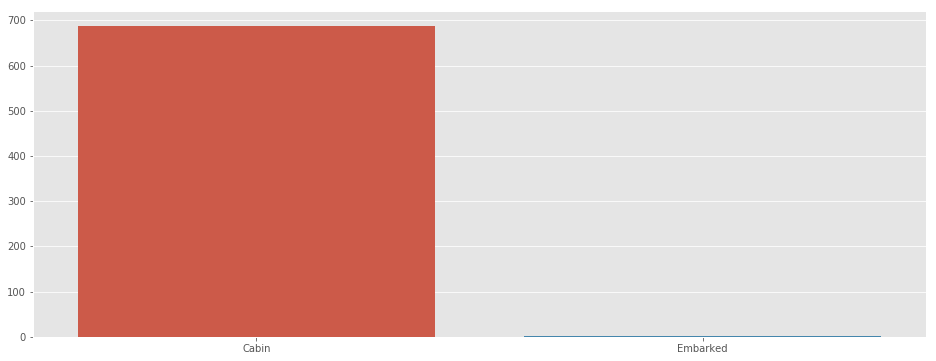

In [9]:
grouped = df.groupby(['Sex','Title','Pclass'])
grouped.Age.median()

df.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

y_nan_values = []
x_nan_values = []
for col in df.columns:
    if(df[col].isna().sum()):
        y_nan_values.append(df[col].isna().sum())
        x_nan_values.append(col)
sns.barplot(x= x_nan_values, y=y_nan_values)

Now that there is no missing values in the Age feature, we can drop the cabin feature 

In [10]:
df = df.drop('Cabin',axis=1)

Then, fill the 2 missing values of "Embarked" with the most common value

In [11]:
most_Embarked = df.Embarked.value_counts().index[0]
df.Embarked = df.Embarked.fillna(most_Embarked)

We check that we indeed remove every missing value

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

#### String values

Now that we took care of the missing values, let's change the string data into numbers.

This, will allow us to change the unique values to integers

In [13]:
df_with_string = df.copy()
for col in df.columns:
    if(df[col].dtype == "object"):
        dic_of_value={}
        i = 0
        for x in pd.unique(df[col]):
            dic_of_value[x]=i
            i+=1
        df[col] = df[col].map(dic_of_value)

Then, we can drop irrelevant string features. "Ticket" has a lot of different features and is also not a determining factor for us, "Name" is a rehearsing of the column "Title" that we previously created.  

In [14]:
df = df.drop('Ticket',axis = 1)
df = df.drop('Name',axis = 1)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,1,26.0,0,0,7.9250,0,2
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0


To conclude, we can change our float to integers for a better uniformity.

In [15]:
for x in df.columns:
    if (df[x].dtype == 'float64'):
        df[x] = (df[x]*100).astype(int)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,2200,1,0,725,0,0
1,2,1,1,1,3800,1,0,7128,1,1
2,3,1,3,1,2600,0,0,792,0,2
3,4,1,1,1,3500,1,0,5310,0,1
4,5,0,3,0,3500,0,0,805,0,0


Our tranformation of this dataset is done, we have no more missing values and no string aswell.

### Exploratory Data Analysis

Visualizing the correlation matrix:

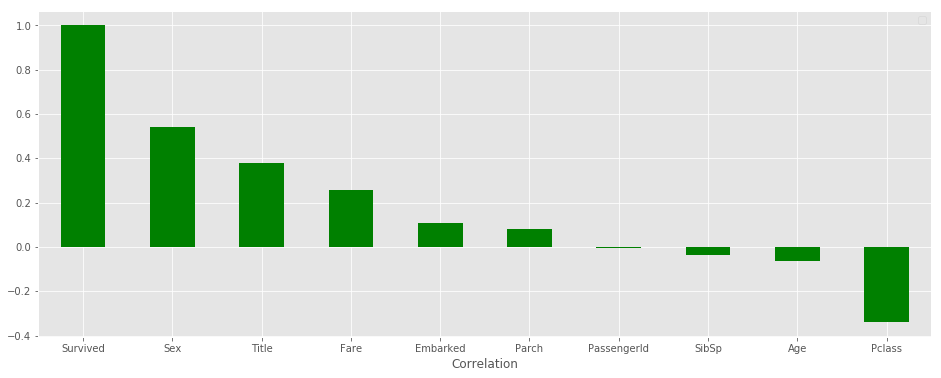

In [16]:
corr = df.corr()
corr_Survived = corr.Survived.sort_values(ascending=False)
corr_Survived.plot(kind='bar', color='green')
plt.xlabel('Correlation')
plt.ylabel('')
plt.xticks(rotation=0)
plt.legend([])
plt.show()

From this graph, we can see that "Sex", "Title" and "PClass" seems to be the most interesting features. Let's take a closer look.

Text(0.5, 1.0, 'Sex')

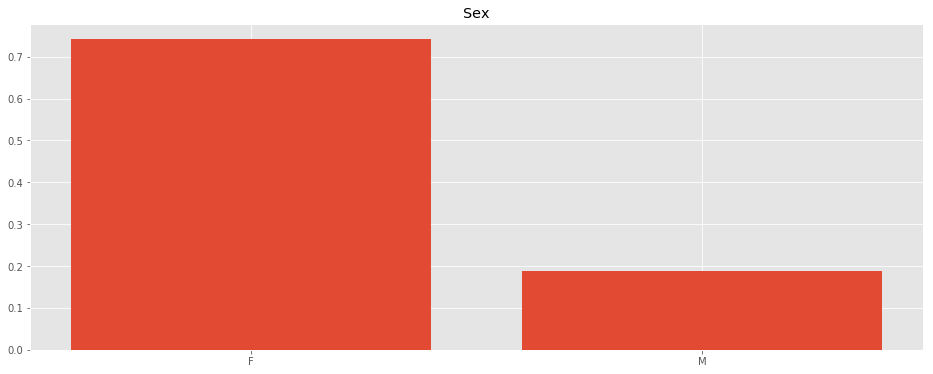

In [17]:
Sex_ratio = df_with_string[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
plt.bar(Sex_ratio["Sex"], Sex_ratio["Survived"],tick_label = ["F","M"])
plt.title("Sex")

We can see that women survived a lot more than men on this dataset

Text(0.5, 1.0, 'Title')

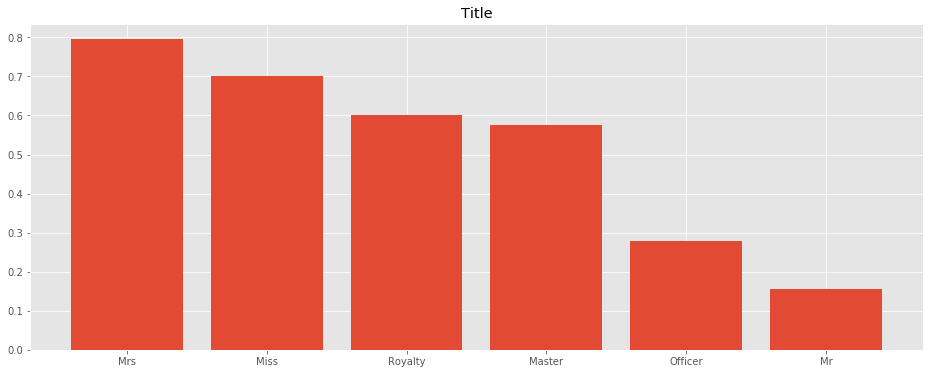

In [18]:
Title_ratio = df_with_string[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)
plt.bar(Title_ratio["Title"], Title_ratio["Survived"])
plt.title("Title")

Overall the survavibility of each title is quite high, just the 'Mr' which is in adequation with the "Sex" graph.

Text(0.5, 1.0, 'PClass')

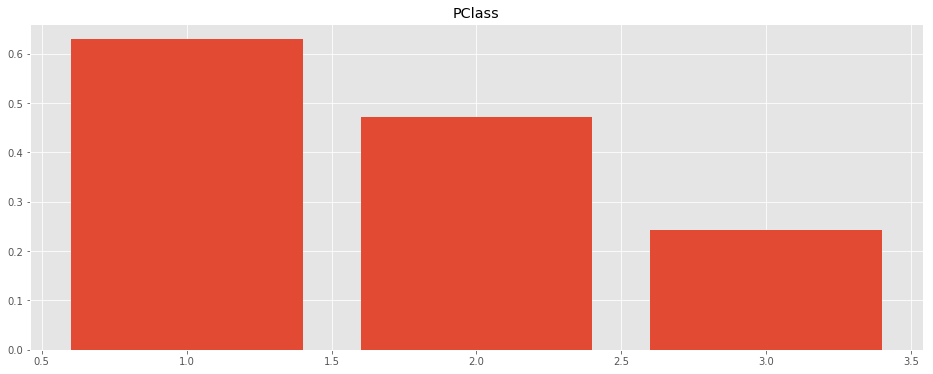

In [19]:
Title_ratio = df_with_string[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
plt.bar(Title_ratio["Pclass"], Title_ratio["Survived"])
plt.title("PClass")

The "PClass" feature is a clear feature with high survability for the first class and a low one for the third.

### Creating our models

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

We define "Survived" as our feature to predict 

Then, we split our data set in train and test data sets with a 33% ratio

In [21]:
X = df.drop(['Survived'],axis=1)
y = df.Survived
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(accuracy_score(Y_pred, Y_test) * 100, 2)


In [23]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(Y_pred, Y_test) * 100, 2)


In [24]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(Y_pred, Y_test) * 100, 2)


In [25]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(Y_pred, Y_test) * 100, 2)


In [26]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(accuracy_score(Y_pred, Y_test) * 100, 2)


In [27]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(Y_pred, Y_test) * 100, 2)


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(Y_pred, Y_test) * 100, 2)


In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_decision_tree

74.58

In [30]:
random_forest = RandomForestClassifier(n_estimators=100)
parameters = {'max_features':np.arange(5,10),'n_estimators':[500],'min_samples_leaf': [10,50,100,200,500]}
random_grid = GridSearchCV(random_forest, parameters, cv = 5).fit(X_train,Y_train)
Y_pred = random_grid.predict(X_test)
acc_random_forest = round(accuracy_score(Y_pred, Y_test) * 100, 2)

### Displaying our results

In [31]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,82.71
2,Logistic Regression,81.02
4,Naive Bayes,79.66
8,Decision Tree,74.58
1,KNN,67.80
0,Support Vector Machines,66.44
5,Perceptron,62.37
6,Stochastic Gradient Decent,40.68
7,Linear SVC,40.68


### Conclusion

By creating a leaderboard with model by their accuracy, we observe:

   - The SGD and Linear SVC models are doing extremly bad 
   - The average accuracy (removing the extreme ones) is around 75
   - Random Forest have the best accuracy (82.71%)

We save our processed data set to use it with our Auto-ML models

In [32]:
df.to_csv('../Data/titanic/no_nan_no_real.csv')